<h1 align="center">Machine Learning and Statistics</h1>


### Hypothesis Testing - Introduction and Summary
Hypothesis testing is a statistical act that tests whether an assumption about a population is correct or not using a sample of the population data. It tests the validity of a **Null Hypothesis** and an **Alternative Hypothesis** between 2 variables.

- [Hypothesis Wikipedia](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)
- [Simple Explanation Hypotheses Testing](https://www.simplilearn.com/tutorials/statistics-tutorial/hypothesis-testing-in-statistics)
- [Null/Alternative Hypothesis](https://www.investopedia.com/terms/n/null_hypothesis.asp)  

- Null Hypothesis. (H0) This proposes that no statistical significance exists in a set of observations or that an event will not occour.
- Alternative Hypothesis. (H1) This is the opposite to the Null Hypothesis and means that it is unlikely the outcome coudl have arisen by chance alone. 

Types of testing : One and Two Tailed Hypothesis Testing
- One Tailed Test: Test to verify if the test outcome is greater than or less than a specific value but not both, e.g. H0: mean = 25, therefore H1 can be greater than or less than 25. 
- Two Tailed Test: Test to verify a range of values, e.g. H0 >= 25 therefore H1 <25. 

P-Value
- This measurement is an indication of the likelihood that an outcome measurement could have occurred by chance. The lower the p-value the greater is the likehood that an outcome could not have occurred by chance and the Hull Hypotheses is rejected. It is usual to set a p-value of 0.05 or 0.01, above these values the Null hypothesis is accepted and at or below it is rejected. 

Usually 4 steps in the process of hypothesis testing: 

1. State the two hypotheses, note that only one can be right.
2. Plan for how the testing will take place and with what data. 
3. Carry out the plan and analyze the results.
4. Based on the results either accept or reject the null hypothesis. 

In the Lady Tasting Tea problem Fisher set out to demonstrate that the lady in question could not tell whether the tea or milk was added first to the tea cups, i.e. the Null Hypothesis. The Alternative hypothesis is the lady can tell the difference.  

He used 8 cups and randomly applied tea or milk first to each of 4 cups. Based on the tasting result, the number of correct cups is determined and based on that it can be calculated what the probability of selecting that amount of correct cups from the is. 

Fishers Tea Test can be used to check whether there is a significant difference between 2 groups, i.e. what is the probability that the difference would arise by chance alone.

In [35]:
# Set up the 8 cups, will be numbered from 0 - 7.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

In [36]:
# https://stackoverflow.com/a/4941932
# https://www.w3schools.com/python/ref_math_comb.asp
# Useful function to calculate how many combinations of a set of x items be obtained from a set y items.
# In this case it is how many combinations of 4 cups can be seletced from 8. 
import math
from math import comb

# Use comb function to alculate number of combinations. Turns out to be 70.
numcombs = comb(len(cups),4)
numcombs

70

In [37]:
# Probability of getting all 4 correct therefore is:
prob = 1/numcombs
prob

0.014285714285714285

- [Number Combinations](https://www.statskingdom.com/combinations-calculator.html)

- [General formula for math.comb](https://docs.python.org/3/library/math.html)

While it is useful to use the inbuilt functions to calculate the number of combinations it can also be done using a simple formula shown below. 

- n!/(k!*(n-k)!) where k is >=n. 

In [38]:
# Using the Tea tasting exercise the formula can be used to produce the number of combinations.
math.factorial(8)/(math.factorial(4)*math.factorial(8-4))

70.0

In [39]:
# https://docs.python.org/3/library/itertools.html
# We can also use Itertools to list out all possible combinations, in this case order is not relevant, e.g. 0,1,4,5 is same as 1,0,5,4.
# Itertools is a suite of functions that allows for quick and efficient actions on iterators, e.g. lists, dicts or tuples. 
import itertools

In [40]:
# Use itertools.combinations to generate all the combinations.
listcombs = list(itertools.combinations(cups,4))
len(listcombs)

70

While there are different ways to get to the number of combinations needed for the test, the results is still the same, 70. This means that there is only a 1 in 70 (~ 0.0143) chance that the lady could identify correctly 4 out of the 8 cups. If in fact she made a correct selection you could conclude that this was not by chance alone and the null hypothesis would be rejected, i.e. she can discriminate by taste alone whether tea or milk is added first. 

What if she selected 3 correctly, what would that look like. In order to do this need to look at the number of possibilities for any selction from the 70 having 0, 1, 2, 3 or 4 correct. 

In [41]:
#Import libraries to test this out and plot the outcomes. 
#https://www.w3schools.com/python/ref_random_choices.asp
# The random method allows for a random selection for a list, in this case we have a list of 70 tea/milk first combinations. 
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
# Using random.choice to pick a random correct answer from the list of 70 to simulate the experiment.
# We assume it is a correct milk first selction. 
milkfirst = set(random.choice(listcombs))
milkfirst

{2, 4, 6, 7}

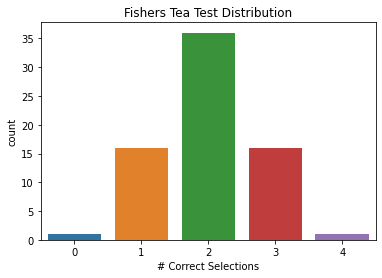

In [43]:
# Now count the overlap between the correct answer, and each of the 70 possiblities.

#https://www.w3schools.com/python/ref_set_intersection.asp
# This is done using Sets,i.e. milkfirst is a set and i loops through each of the 70 combinations in turn. At each iteration a new set is created which contains the elements common in both and these are counted. 

counts = [len(milkfirst.intersection(i)) for i in listcombs]

# Create the plot of the counts.
ax = sns.countplot(x=counts)
ax.set_xlabel('# Correct Selections')
ax.set_ylabel('count')
ax.set_title('Fishers Tea Test Distribution')
plt.show()

From the distribution above it is clear that while there is only one outcome for either getting all right or wrong there are many possibilities of getting 1, 2 or 3. This shows that even getting 3 correct could arise by chance given the number of possibilities.

#### Exercise 1.1

The above gives about a .014 probability of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

From the calculations above, using a selection of 4 out of 8 cups the probabliity of making 4 correct selections is 1 out of 70 is 0.014285714285714285, or 1.43% approx. 

What might a probability of <= 1% or 0.01 look like. 

In [44]:
# Try 3 out of 8 cups
newprob = 1/comb(8,3)
newprob

0.017857142857142856

Not that, probability goes up for selecting 3 out of 8. 

What about 5 out of 10.

In [45]:
# Try 5 out of 10.
newprob = 1/comb(10,5)
newprob

0.003968253968253968

5 out of 10 would give a probability of 0.00396, i.e. much less than 1%. On the basis that half the number of cups be tea or milk first then this is the next feasible combination to give that level of probability. 

In [46]:
# Try 5 out of 9.
newprob = 1/comb(9,4)
newprob

0.007936507936507936

5 put of 9 would work as would as would 4 out of 9 as it five the same result of .00793. If we are looking for the minumum number of cups then 4 would be it. 

#### Exercise 1.2

How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

#### Exercise 1.3
Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

Fisher_exact from scipy.stats can be used to calculate the probability as done above manually. It uses a 2 x 2 table and returns the p-value. 

In [47]:
# https://github.com/scipy/scipy/blob/v1.9.2/scipy/stats/_stats_py.py#L4492-L4723
import scipy.stats as ss
from scipy.stats import fisher_exact

In [48]:
#Set up a table to mimic the scenario of Milk/Tea in which 4 cups have milk first and 4 have tea first.
import pandas as pd
table = [[4,0],[0,4]]
df = pd.DataFrame(table, index = ["Tea", "Milk"], columns = ["Milk", "Tea"])
df

,Milk,Tea
Tea,4,0
Milk,0,4


In [49]:
# Note that the outcome , the p-value, here is double that of the original 1/70 outcome above which indicates it is calculatng a two tailed test, need to divide by 2 for a one-tailed test.
oddsratio, pvalue = fisher_exact(table)
pvalue

0.028571428571428536

[Scipy Stats Hypergeom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html)
 https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4

A Hypergeometric distribution is used to determine the probabality of making of making a specific selection without replacement from a population. It uses the following parameters:
- The total number of items being selected from - M
- The total number of the desired selection from M,  - n
- The number of selections to make, - N
- The number of desired items from the selection, - x

In [50]:
# calculate for all values of x.
import numpy as np
from scipy.stats import hypergeom
[M, n, N] = [8, 4, 4]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
tea_milk = rv.pmf(x)
tea_milk

array([0.01428571, 0.22857143, 0.51428571, 0.22857143, 0.01428571])

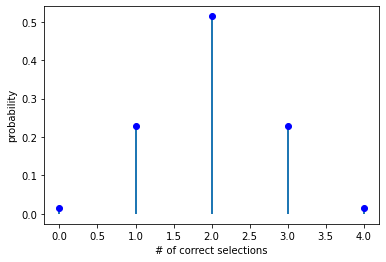

In [51]:
# Plot the outcome, same as the original plot for the tea test. 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, tea_milk, 'bo')
ax.vlines(x, 0, tea_milk, lw=2)
ax.set_xlabel('# of correct selections')
ax.set_ylabel('probability')
plt.show()

### t-Testing

One of the most common statistical tests, at its most basic it compares the means between 2 unrelated groups and indicates whether there is a statistically significant difference between both. 

In practice this means taking samples from 2 populations and testing whether there is a similarity between both. 

In [64]:
# Generate two datasets, one with a mean of 1 and std dev of 0.4, the other with a mean of 2 and a std dev of 0.4. 
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
n = 40

# Use random.normal to generate the data sets.
a = np.random.normal(loc=m_a, scale=s_a, size = n)
b = np.random.normal(loc=m_b, scale=s_b, size = n)

# Convery them to a pandas dataframe. np.hstack is used to stack one dataset on top of another (https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)
df = pd.DataFrame({'Category':['A']*len(a) + ['B']*len(b), 'value': np.hstack([a,b])})
df

,Category,value
0,A,0.568856
1,A,0.989372
2,A,1.331343
3,A,1.506035
4,A,0.946029
...,...,...
75,B,2.986456
76,B,2.569197
77,B,2.839904
78,B,1.410390


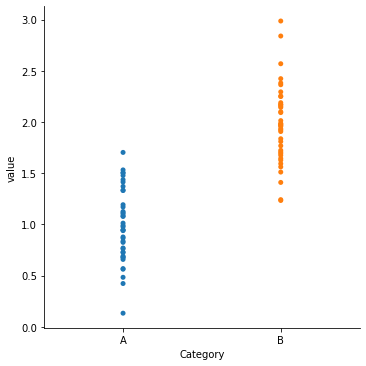

In [65]:
# Plot the dataframe, jitter = false is used to make the plot clearer. 
sns.catplot(x = 'Category', y='value', jitter = False , data=df)

In [72]:
# use the statistics package to easily calculate means.
import statistics
n1 = len(a)
n2 = len(b)

m1 = statistics.mean(a)
m2 = statistics.mean(b)

In [73]:
# Calculate the standard deviation of the (a) dataset.
sdeva = statistics.stdev(a)
sdeva

0.3527867623799357

In [74]:
# Calculate the standard deviation of the (b) dataset
sdevb = statistics.stdev(b)
sdevb

0.38157172849941096

In [75]:
# Now calculate the t value. 
df = n1 + n2 - 2
sp2 = ((n1 - 1) * sdeva**2 + (n2 - 1) * sdevb**2) / df
t = (m1 - m2) / (np.sqrt(sp2) * np.sqrt(1.0/n1 + 1.0/n2))
t

-12.01886223368867

### Exercise 1.4
Trying out scipy stats ttest.  
   
. [scipy stats ttest docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [117]:
# Import the package and generate a seed, rng. 
import statsmodels.stats.weightstats as stat
rng = np.random.default_rng()
rng

# It takes a number of paramaters,main ones being:
# a, b - the datasets or arrays to be tested.

Generator(PCG64) at 0x1FB1CC29820

In [118]:
t_ss, p_ss, d_sm = stat.ttest_ind(a,b)
print(t_ss, p_ss, d_sm)


-12.018862233688672 1.9713568007031136e-19 78.0


In [119]:
t_ss, p_ss= ss.ttest_ind(a,b)
print(t_ss, p_ss)

-12.018862233688672 1.9713568007031136e-19


In [120]:
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x1FB1CC29740

In [121]:
# https://pythonguides.com/python-scipy-stats-norm/
# Functon generates random samples from a normal distribution.
# loc is the mean, scale is the standard deviation, size is the number of samples and random_state is the seed.
# Looking at 2 data sets, rvs1 and rvs2 thathave the same sample means. 
rvs1 = stat.stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

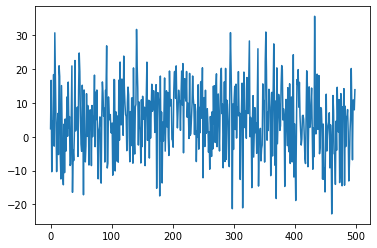

In [122]:
# This is what rvs1 looks like. 
plt.plot(rvs1);

In [123]:
# Now plot rvs2 as an identical 
rvs2 = stat.stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

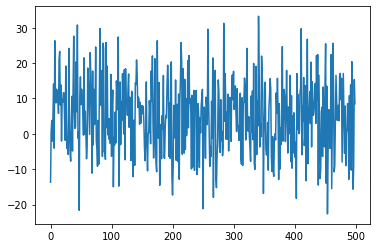

In [124]:
plt.plot(rvs2);

In [133]:
# Now generate the the t test, it returns 2 values, the t-value and the p-value. In thsi case the p-value is greater than the threshold of 0.05 and therefore the Null Hypothesis that the means are equal is not rejected. 
stat.stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.3102838287866303, pvalue=0.7564099109000157)

In [138]:
# Create an additional dataset. In the this case the p-value is below the 0.05 threshold, the Null hypothesis is rejected that the means are equal.
rvs3 = stat.stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng) 
stat.stats.ttest_ind(rvs1, rvs3, equal_var=True)

Ttest_indResult(statistic=-2.670209247171776, pvalue=0.007786517227159793)